In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_1 = pd.read_csv('../data/routes_1.txt')
df_2 = pd.read_csv('../data/routes_2.txt')

In [4]:
location_subnet_dict_1 = {}
location_subnet_dict_1 = defaultdict(lambda:0, location_subnet_dict_1)

for i in range(len(df_1)):
    location_subnet_dict_1[df_1.iloc[i]["Location"]] += 1


location_subnet_dict_2 = {}
location_subnet_dict_2 = defaultdict(lambda:0, location_subnet_dict_2)

for i in range(len(df_2)):
    location_subnet_dict_2[df_2.iloc[i]["Location"]] += 1

In [5]:
val_1 = np.array(list(location_subnet_dict_1.values()))
val_2 = np.array(list(location_subnet_dict_2.values()))
val_1

array([ 17,   3,   9,  13,   2,   2,  75,   3,   3, 110,  62,   6,  11,
         6,   1,   9,   5,   1,   1,   2,   2,   2,   1,   2,   1,   4,
         7,   3,   2,   2,  76,   8,  15,   3,  16,   1,   1, 176,  15,
        42,  18,  21,  75,  23,  78,  23,  39,  26,   8,   7,   1,  23,
         2,  88,   5,  47,   3,  32,   4,   1,   4,  41,   4,   3])

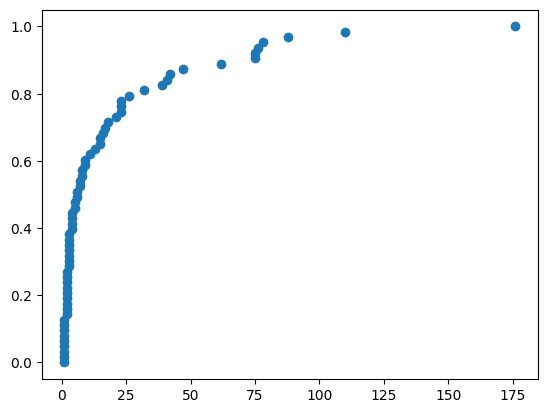

In [6]:

x= np.sort(val_1)
y = 1. * np.arange(len(val_1)) / (len(val_1) - 1)
plt.scatter(x,y)
plt.show()

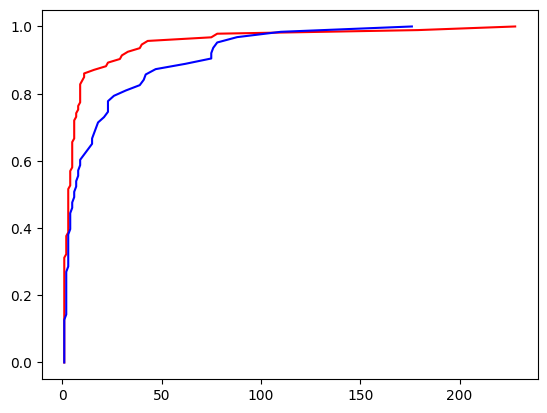

In [7]:
# sns.distplot(val_2, color = 'Blue')
x1= np.sort(val_2)
y1 = 1. * np.arange(len(val_2)) / (len(val_2) - 1)
plt.plot(x1,y1,color = 'Red')
plt.plot(x,y,color = 'Blue')
plt.show()

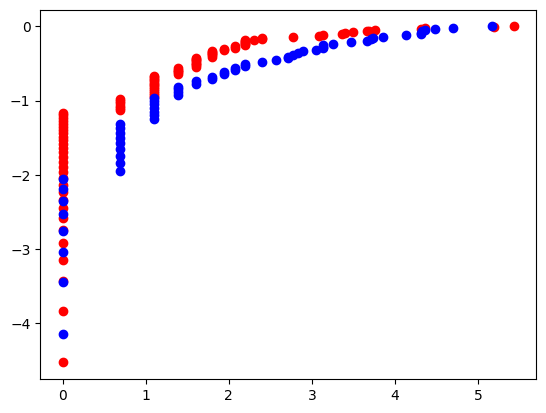

In [8]:
plt.scatter(np.log(x1),np.log(y1),color = 'Red')
plt.scatter(np.log(x),np.log(y),color = 'Blue')

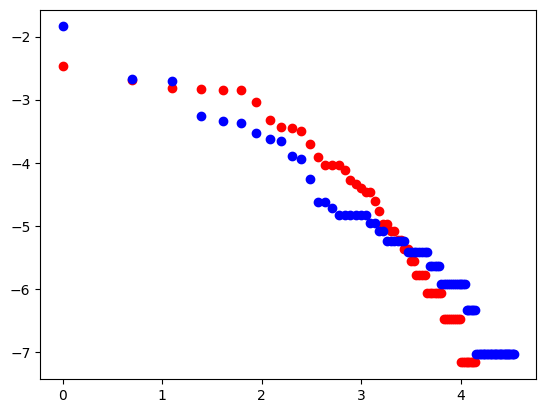

In [9]:
def probabilities(sum, freqs):
    probs = []
    for i in freqs:
        probs.append(i/sum)
    return probs
s1= sum(val_1)
s2 = sum(val_2)
pdf1 = np.sort(probabilities(s1,val_1))[::-1]
pdf2 = np.sort(probabilities(s2,val_2))[::-1]
x1 = range(len(pdf1))
x2 = range(len(pdf2))
plt.scatter(np.log(x1),np.log(pdf1), color ='Red')
plt.scatter(np.log(x2),np.log(pdf2), color ='Blue')


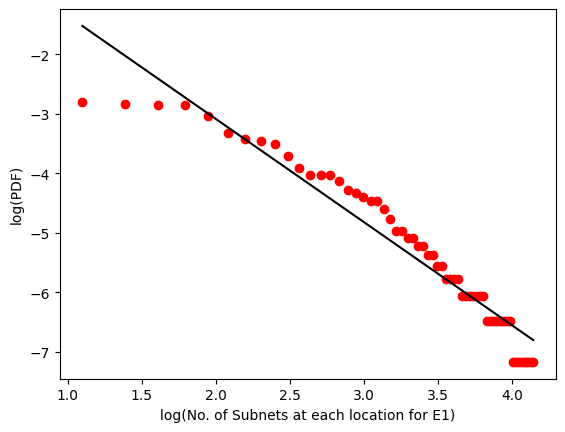

[-1.73244971] 0.3776094137260442


In [10]:
X1 = np.log(x1[3:]).reshape((-1,1))
Y1 = np.log(pdf1[3:])
m1 = LinearRegression().fit(X1,Y1)
s1 = m1.coef_
i1 = m1.intercept_
plt.scatter(X1, Y1,color='r')
plt.plot(X1, m1.predict(X1),color='k')
plt.ylabel("log(PDF)")
plt.xlabel("log(No. of Subnets at each location for E1)")
plt.show()
print(s1,i1)

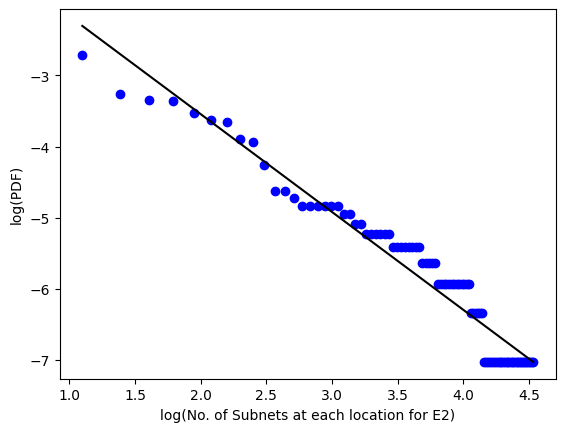

[-1.37595756] -0.7919151813575711


In [11]:
X2 = np.log(x2[3:]).reshape((-1,1))
Y2 = np.log(pdf2[3:])
m2 = LinearRegression().fit(X2,Y2)
s2 = m2.coef_
i2 = m2.intercept_
plt.scatter(X2, Y2,color='b')
plt.plot(X2, m2.predict(X2),color='k')
plt.ylabel("log(PDF)")
plt.xlabel("log(No. of Subnets at each location for E2)")
plt.show()
print(s2,i2)

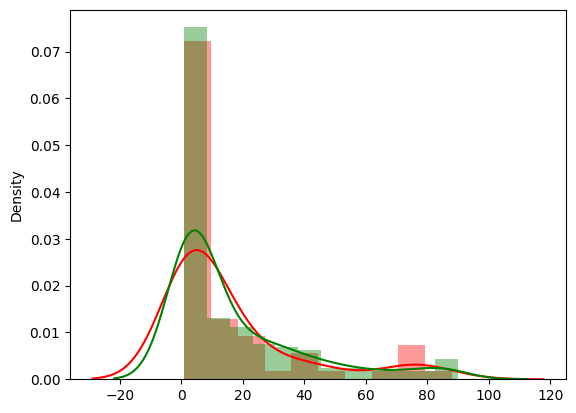

In [12]:
zipf1 = np.random.zipf(a=1.04, size=1000)

sns.distplot(val_1[val_1<100], color = 'Red')
sns.distplot(zipf1[zipf1<100], color = 'Green')
plt.show()

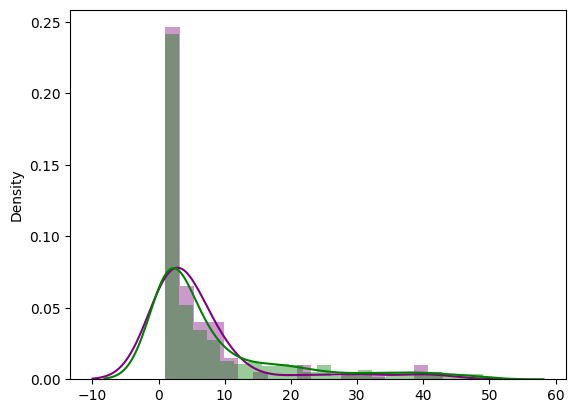

In [13]:
zipf2 = np.random.zipf(a=1.23, size=1000)

sns.distplot(val_2[val_2<50], color = 'Purple')
sns.distplot(zipf2[zipf2<50], color = 'Green')
plt.show()